<a href="https://colab.research.google.com/github/nomanmehar5/PREDICTION-OF-EARTH-QUAKE-FYP/blob/main/FYP_PREDICTION_OF_EARTH_QUAKE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import  r2_score
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import LSTM, Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/FYP/earthquack_dataset.csv")
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
data.shape

(23412, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [ ]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [6]:
dataa = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
dataa.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


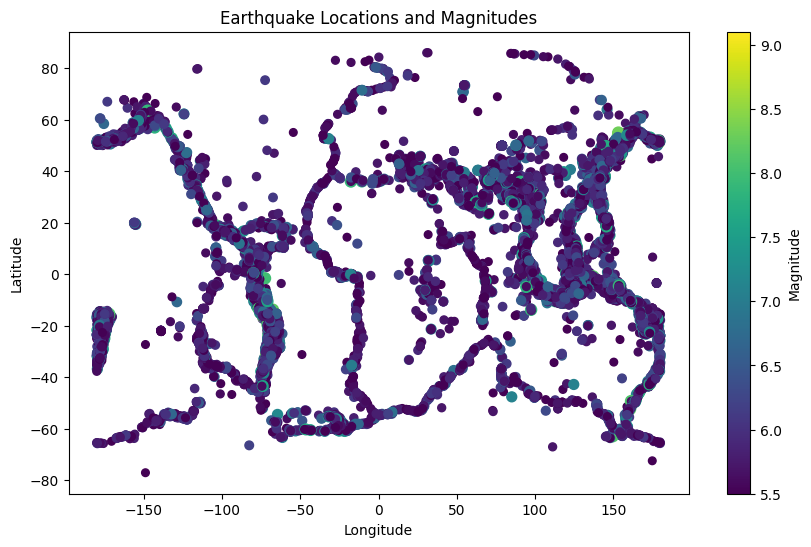

In [7]:
df = pd.DataFrame(dataa)

# Visualization 1: Scatter plot of Latitude vs Longitude
plt.figure(figsize=(10, 6))
plt.scatter(df["Longitude"], df["Latitude"], c=df["Magnitude"], cmap="viridis", s=df["Magnitude"] ** 2)
plt.colorbar(label="Magnitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earthquake Locations and Magnitudes")
plt.show()

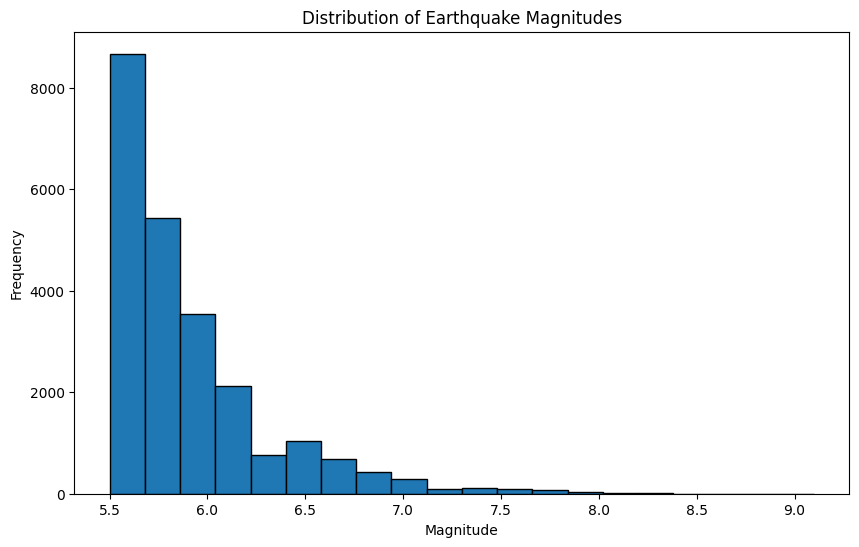

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df["Magnitude"], bins=20, edgecolor="black")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Distribution of Earthquake Magnitudes")
plt.show()

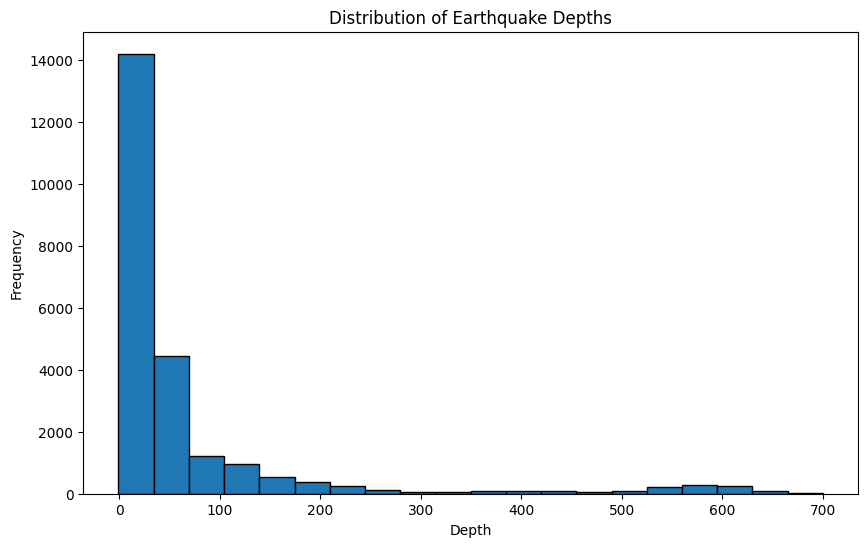

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df["Depth"], bins=20, edgecolor="black")
plt.xlabel("Depth")
plt.ylabel("Frequency")
plt.title("Distribution of Earthquake Depths")
plt.show()

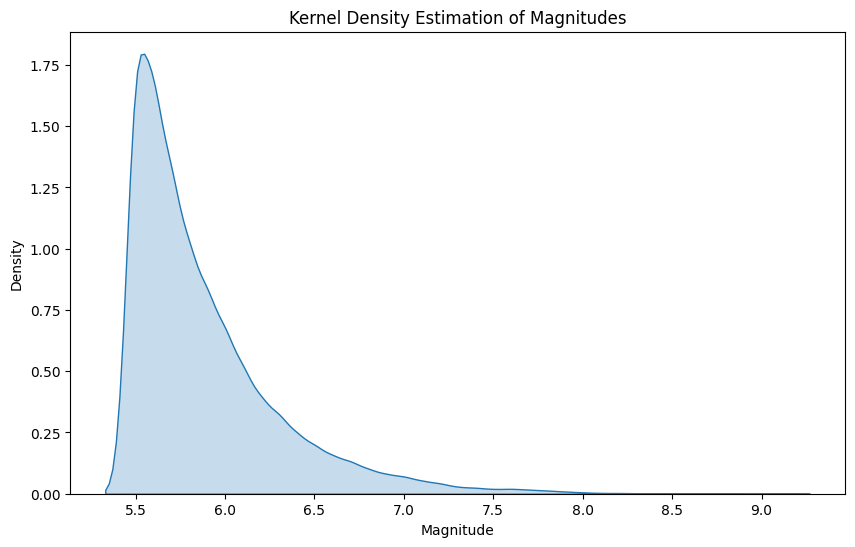

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df["Magnitude"], fill=True)
plt.xlabel("Magnitude")
plt.ylabel("Density")
plt.title("Kernel Density Estimation of Magnitudes")
plt.show()

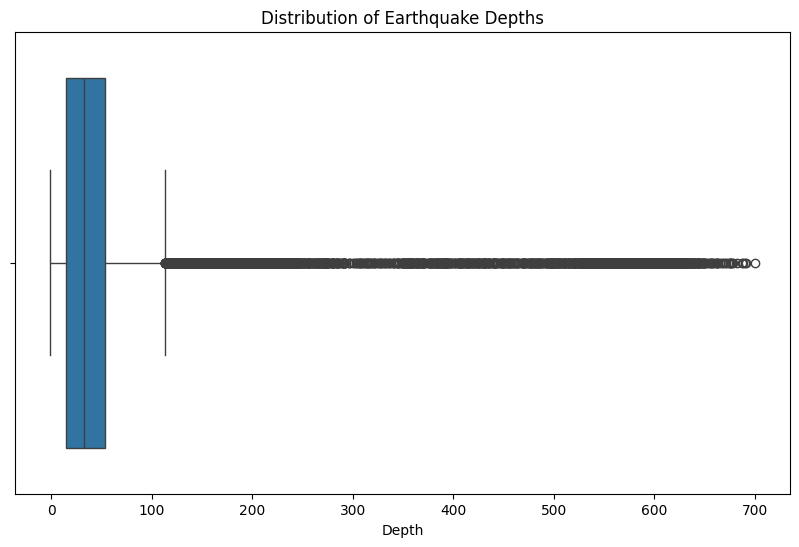

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Depth"])
plt.xlabel("Depth")
plt.title("Distribution of Earthquake Depths")
plt.show()

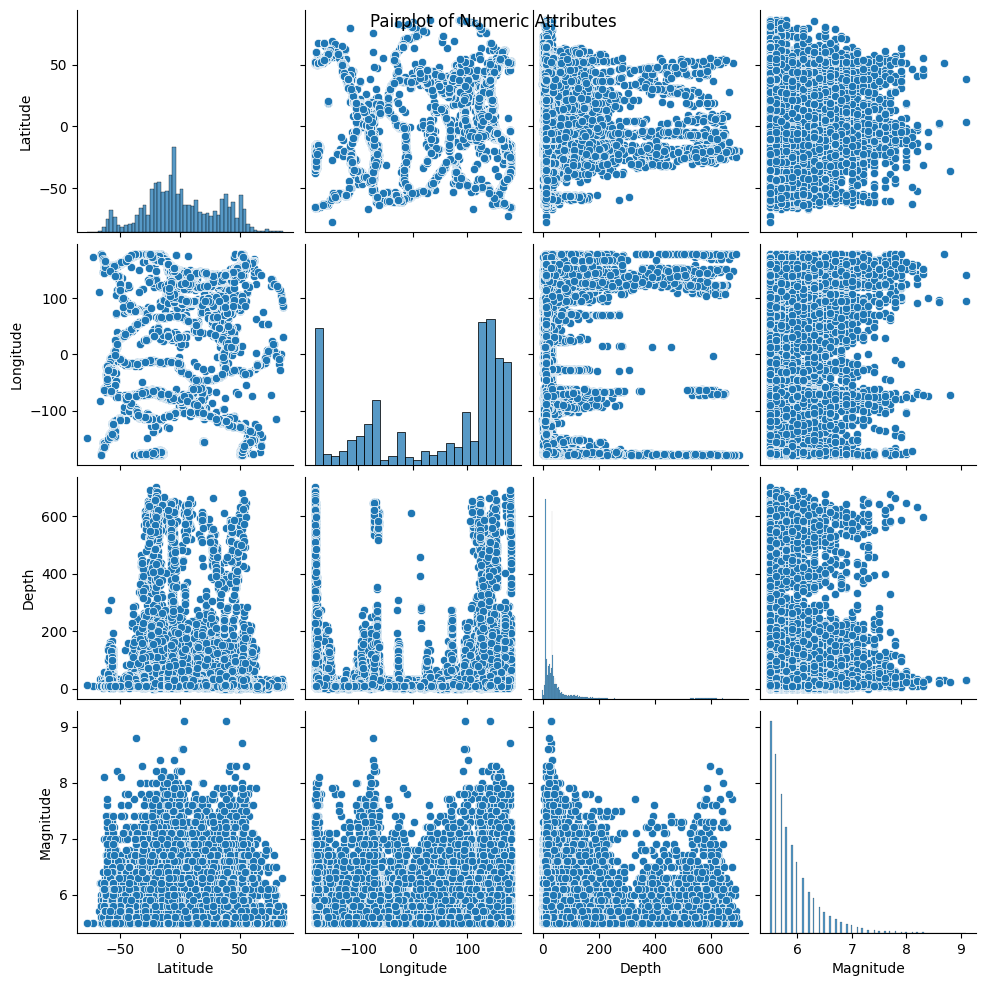

In [ ]:
sns.pairplot(df[["Latitude", "Longitude", "Depth", "Magnitude"]])
plt.suptitle("Pairplot of Numeric Attributes")
plt.show()

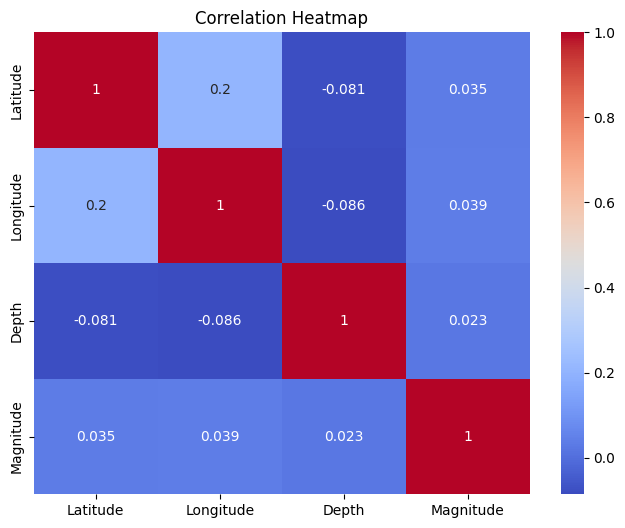

In [ ]:
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

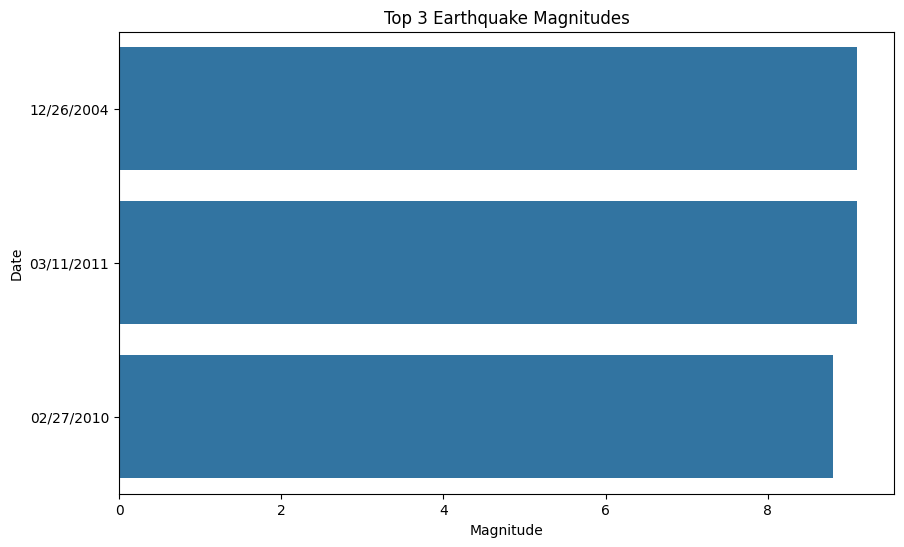

In [ ]:
top_n = 3
top_magnitudes = df.nlargest(top_n, "Magnitude")
plt.figure(figsize=(10, 6))
sns.barplot(x="Magnitude", y="Date", data=top_magnitudes, orient="h")
plt.xlabel("Magnitude")
plt.ylabel("Date")
plt.title(f"Top {top_n} Earthquake Magnitudes")
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


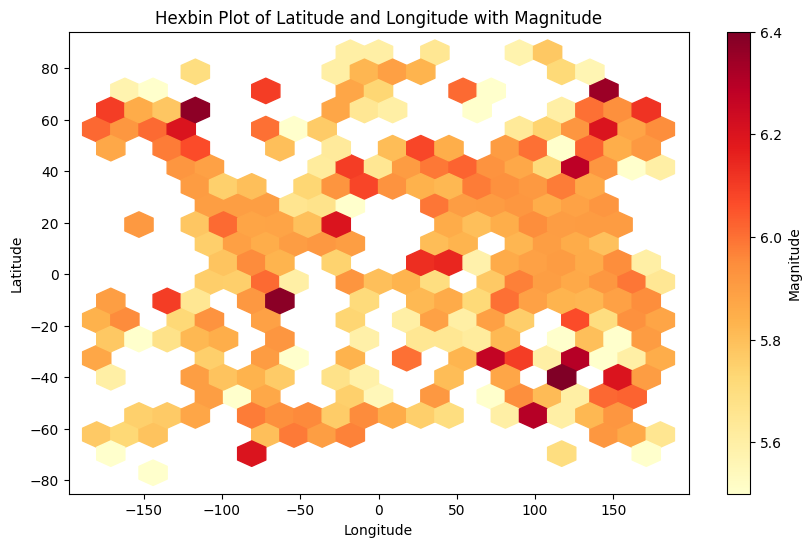

In [ ]:
plt.figure(figsize=(10, 6))
plt.hexbin(df["Longitude"], df["Latitude"], C=df["Magnitude"], gridsize=20, cmap="YlOrRd")
plt.colorbar(label="Magnitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Hexbin Plot of Latitude and Longitude with Magnitude")
plt.show()

In [8]:
df = pd.DataFrame(dataa)

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Print the transformed Date column
print(df["Date"])

0       1965-01-02
1       1965-01-04
2       1965-01-05
3       1965-01-08
4       1965-01-09
           ...    
23407   2016-12-28
23408   2016-12-28
23409   2016-12-28
23410   2016-12-29
23411   2016-12-30
Name: Date, Length: 23412, dtype: datetime64[ns]


In [9]:
import datetime

def safe_timestamp(dt):
    # Calculate the seconds from epoch (January 1, 1970)
    epoch = datetime.datetime(1970, 1, 1)
    if dt < epoch:
        # Calculate seconds before epoch for dates prior to 1970
        return (epoch - dt).total_seconds() * -1
    else:
        # Calculate seconds after epoch for dates post-1970
        return (dt - epoch).total_seconds()

timestamp = []
for d, t in zip(dataa['Date'], dataa['Time']):
    try:
        ts = datetime.datetime.strptime(d + ' ' + t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(safe_timestamp(ts))
    except ValueError:
        timestamp.append('ValueError')

In [10]:
timeStamp = pd.Series(timestamp)
dataa['Timestamp'] = timeStamp.values

<ipython-input-10-c14a972cbf38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataa['Timestamp'] = timeStamp.values


In [11]:
final_data = dataa.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-157630542.0
1,1.863,127.352,80.0,5.8,-157465811.0
2,-20.579,-173.972,20.0,6.2,-157355642.0
3,-59.076,-23.557,15.0,5.8,-157093817.0
4,11.938,126.427,15.0,5.8,-157026430.0


In [12]:
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18727, 3) (4682, 3) (18727, 2) (4682, 2)


In [16]:
# Instantiate models
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor()

# Train the models
linear_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

# Make predictions
linear_reg_preds = linear_reg.predict(X_test)
random_forest_preds = random_forest_reg.predict(X_test)

# Evaluate performance
linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
random_forest_mse = mean_squared_error(y_test, random_forest_preds)

linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)
random_forest_mae = mean_absolute_error(y_test, random_forest_preds)

linear_reg_r2=r2_score(y_test, linear_reg_preds)
random_forest_r2=r2_score(y_test, random_forest_preds)


print("Linear Regression MSE:", linear_reg_mse)
print("Random Forest Regressor MSE:", random_forest_mse)
print("Linear Regression MAE:", linear_reg_mae)
print("Random Forest Regressor MAE:", random_forest_mae)

print("Linear Regression R2:", linear_reg_r2)
print("Random Forest Regressor R2:", random_forest_r2)

Linear Regression MSE: 7452.967791227382
Random Forest Regressor MSE: 945.85451965008
Linear Regression MAE: 35.154104282893165
Random Forest Regressor MAE: 9.999882506407547
Linear Regression R2: 0.009080129255452152
Random Forest Regressor R2: 0.39308525521266574


In [ ]:
#SIMPLE LSTM
from tensorflow.keras.layers import LSTM

model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(2)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
y_pred = model_lstm.predict(X_test)

# Calculate RMSE and R2 score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
LSTM_mae=mean_absolute_error(y_test, y_pred)


print("LSTM RMSE:", rmse)
print("LSTM R2 Score:", r2)
print("LSTM MAE Score:", LSTM_mae)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


527/527 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1985533050880.0000 - val_loss: 11584.9844
Epoch 2/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 208535632.0000 - val_loss: 8763.0205
Epoch 3/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 10969.6807 - val_loss: 22531.2734
Epoch 4/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 14250.2432 - val_loss: 19814.7168
Epoch 5/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 41937.3281 - val_loss: 32190.0078
Epoch 6/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 57019652.0000 - val_loss: 13503509504.0000
Epoch 7/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3927574272.0000 - val_loss: 188067.5781
Epoch 8/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 276961920.0000 - val_loss: 2298721.0000
Epoch 9/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8474605568.0000 - val_loss: 27506.8516
Epoch 10/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 16523.2266 - val_loss: 8653.6807
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3

In [ ]:
#DEEPLSTM MODEL
from tensorflow.keras.layers import LSTM

model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
    BatchNormalization(),
    LSTM(64, activation='relu', return_sequences=True),
    BatchNormalization(),
    LSTM(64, activation='relu'),
    Dense(2)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

y_pred = model_lstm.predict(X_test)

# Calculate RMSE and R2 score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
lstmm_mae=mean_absolute_error(y_test, y_pred)
print("RESULTS FOR LSTM MODEL WITH HIDDEN LAYERS")
print("RMSE:", rmse)
print("R2 Score:", r2)
print("MAE Score:", lstmm_mae)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 8328.4619 - val_loss: 7923.0903
Epoch 2/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 7826.6367 - val_loss: 7863.5020
Epoch 3/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 7809.5122 - val_loss: 7866.5752
Epoch 4/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 7201.9272 - val_loss: 7873.2319
Epoch 5/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 7735.4873 - val_loss: 7922.1587
Epoch 6/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 7550.5249 - val_loss: 7877.2285
Epoch 7/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 7184.1865 - val_loss: 7870.6172
Epoch 8/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 7697.5283 - val_loss: 7876.2432
Epoch 9/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 7357.1587 - val_loss: 7881.5117
Epoch 10/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 7253.0981 - val_loss: 7892.8989
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
RESULTS FOR LSTM MODEL WITH HIDDE

In [ ]:
from tensorflow.keras.layers import GRU

model_gru = Sequential([
    GRU(64, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
    BatchNormalization(),
    GRU(64, activation='relu'),
    Dense(2)
])

model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

y_pred = model_gru.predict(X_test)

# Calculate RMSE and R2 score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
gru_mae=mean_absolute_error(y_test, y_pred)
print("RESULTS FOR GRU MODEL")
print("RMSE:", rmse)
print("R2 Score:", r2)
print("MAE Score: ", gru_mae)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


527/527 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 7852.0039 - val_loss: 28231368.0000
Epoch 2/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 7269.8423 - val_loss: 7746.2148
Epoch 3/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 7313.9048 - val_loss: 8033.0439
Epoch 4/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 6848.4731 - val_loss: 7924.6548
Epoch 5/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 6706.3857 - val_loss: 7576.9717
Epoch 6/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 6848.3813 - val_loss: 7865.7065
Epoch 7/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6755.3789 - val_loss: 7466.0698
Epoch 8/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6853.0142 - val_loss: 7397.3486
Epoch 9/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 6614.5947 - val_loss: 7520.7300
Epoch 10/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 6648.8511 - val_loss: 6976.5938
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
RESULTS FOR GRU MODEL
RMSE: 81.20017703182

In [14]:

# Build the MLP model
model_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(2)  # Two outputs: Magnitude and Depth
])

model_mlp.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_mlp.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Make predictions
y_pred_mlp = model_mlp.predict(X_test)

# Evaluate performance
mlp_rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
mlp_r2 = r2_score(y_test, y_pred_mlp)
mlp_mae = mean_absolute_error(y_test, y_pred_mlp)

print("MLP RMSE:", mlp_rmse)
print("MLP R² Score:", mlp_r2)
print("MLP MAE Score:", mlp_mae)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


527/527 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 163380572717056.0000 - val_loss: 26275632.0000
Epoch 2/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 920820736.0000 - val_loss: 35349958656.0000
Epoch 3/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21135433728.0000 - val_loss: 321872.7812
Epoch 4/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4750708736.0000 - val_loss: 41333301248.0000
Epoch 5/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14425415680.0000 - val_loss: 5345005568.0000
Epoch 6/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 84537696256.0000 - val_loss: 31561706.0000
Epoch 7/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1804800768.0000 - val_loss: 19999584256.0000
Epoch 8/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60081233920.0000 - val_loss: 14526907.0000
Epoch 9/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 102884089856.0000 - val_loss: 3525073.7500
Epoch 10/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 188875505664.0

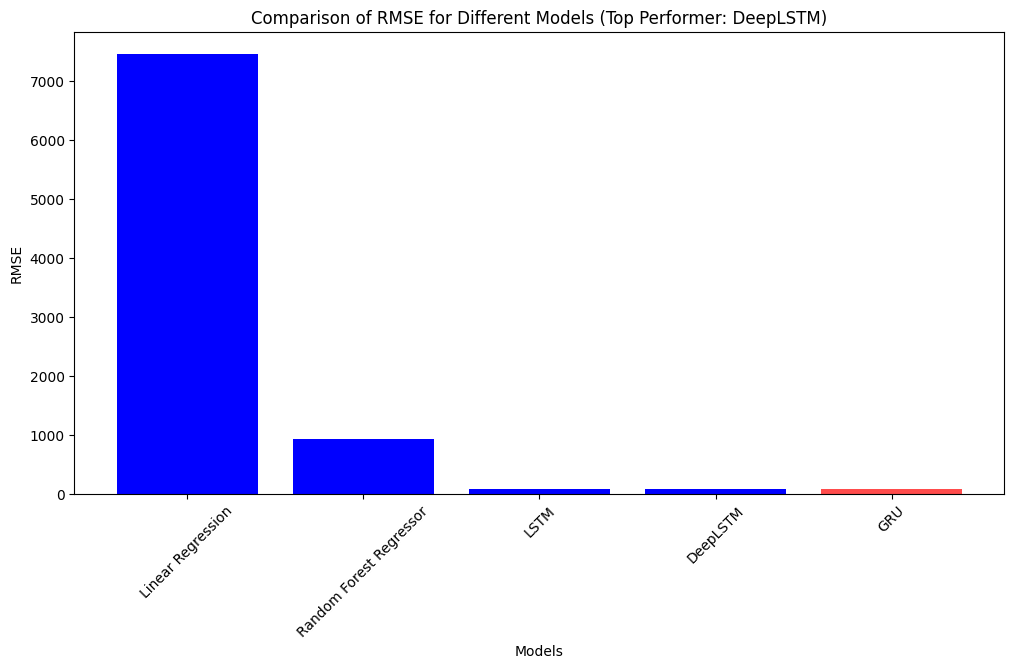

In [15]:
import matplotlib.pyplot as plt

models = ["Linear Regression", "Random Forest Regressor", "LSTM", "DeepLSTM", "GRU"]
rmse = [7452.97, 945.85, 91.70, 87.02, 81.20]

# Find the index of the top performer (DeepLSTM)
top_performer_index = models.index("GRU")

# Create a list of colors, with 'red' for the top performer and 'blue' for others
colors = ['red' if i == top_performer_index else 'blue' for i in range(len(models))]

# Create a bar chart with a larger bar for the top performer
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
bars = plt.bar(models, rmse, color=colors)
bars[top_performer_index].set_alpha(0.7)  # Make the top performer's bar slightly transparent
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("Comparison of RMSE for Different Models (Top Performer: DeepLSTM)")
plt.xticks(rotation=45)
plt.show()